# Data Exploration

In [1]:
# Setup Environment
from setup import *

Progress: [####################] 100.0%
Added 1048 patients


## BI-RADS

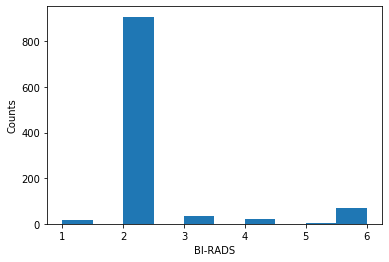

In [2]:
plt.hist(explorations['BIRADS'])
plt.xlabel('BI-RADS')
plt.ylabel('Counts')
plt.show()

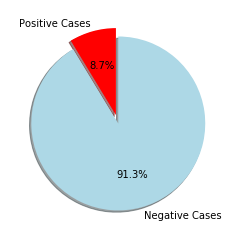

In [3]:
# Positive to negative ratio
cancer = np.where(explorations.BIRADS>3,1,0)
labels = 'Positive Cases', 'Negative Cases'
sizes = [np.sum(cancer), len(cancer)-sum(cancer)]
explode = (0, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=['red','lightblue'])
plt.show()

## Data Origin 

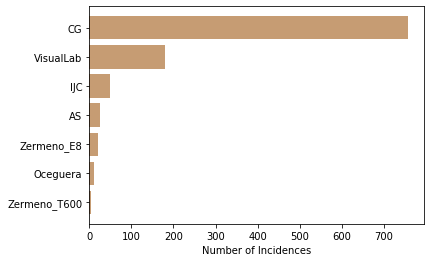

In [4]:
# Explore data origin
fig, ax = plt.subplots()

most_common_cat = explorations.index.get_level_values(2).value_counts().sort_values()
most_common_cat.values


categs = most_common_cat.index
y_pos = np.arange(len(categs))
counts = most_common_cat.values

plt.barh(y_pos, counts, align='center', alpha=0.5)
plt.barh(y_pos, counts, align='center', alpha=0.5)
plt.yticks(y_pos, categs)
plt.xlabel('Number of Incidences')
plt.show()

## PCA Visualization

In [8]:
def plot_pcs(df,dropcols, alt_color=True, n_comp=5):
    ''' Plot PCs by BIRADS.
    
    Parameters
    ----------
    alt_color: boolean
                Indicates whether to color by BIRADS or cancer status.
    '''
    pca = PCA(n_components=n_comp)
    pcs = pca.fit_transform(df.drop(dropcols, axis=1))
    pcs = pd.DataFrame(pcs, 
                       columns = ['PC' + str(i+1) 
                                  for i in range(len(pcs[0]))])
    pcs['BIRADS']=df.BIRADS.values
    if alt_color:
        pcs['cancer'] = np.where(pcs.BIRADS>3,1,0)
        pcs = pcs.drop(columns=['BIRADS'])
    sns.pairplot(pcs, hue = pcs.columns[-1], 
                 vars = pcs.columns[:-1],
                 diag_kind='hist')
    return pcs

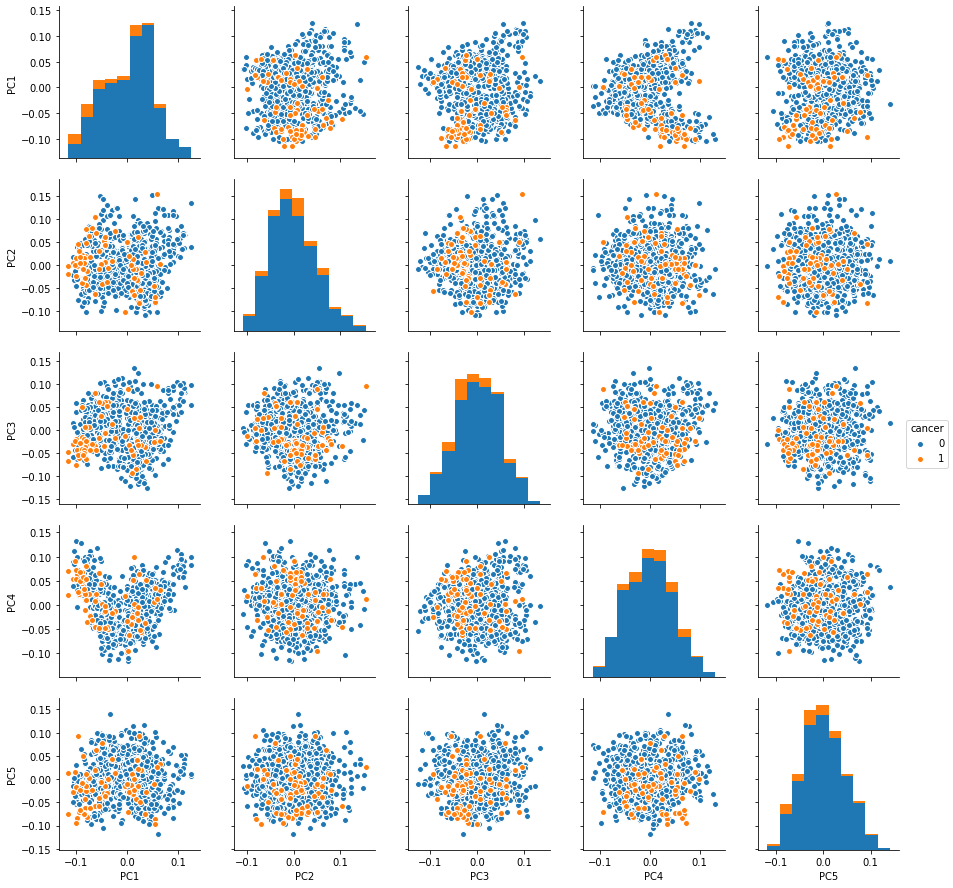

In [24]:
dropcols = ['Unnamed: 0','BIRADS','vasc', 'lbp_deltas']
train_data = pd.read_csv('train_data.csv')
pcs = plot_pcs(train_data,dropcols)

## T-SNE Scores 

In [25]:
# Calculate t-SNE scores
tsne = TSNE(n_components=2, init='random',
            perplexity=30, n_iter = 10000)

comps = tsne.fit_transform(train_data.drop(dropcols, axis=1))

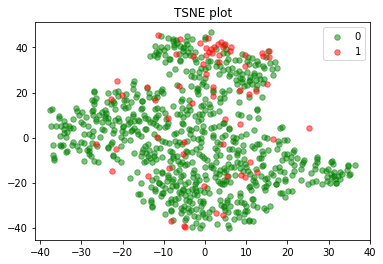

In [26]:
# Plot t-SNE
def plt_tsne(df,comps):
    cdict = {0:'green',1:'red'}
    df['cancer'] = np.where(df.BIRADS>3,1,0)
    fig, ax = plt.subplots()
    for g in np.unique(cancer):
        ix = np.where(df['cancer'] == g)
        ax.scatter(comps[ix, 0], comps[ix, 1], c = cdict[g],
                   label = g, s = 30, alpha = 0.5)
    ax.legend()
    plt.title('TSNE plot')
    plt.show()

plt_tsne(train_data,comps)